In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

C:\Users\3lett\AppData\Local\Temp\ipykernel_8492\3624788073.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
# df1 = pd.read_excel("Data/statistic_id785203_students-with-federal-loans-for-higher-education-us-2023-by-repayment-status.xlsx", sheet_name='Data', skiprows=4, usecols=['Unnamed: 1', 'Unnamed: 2'])
# df1.rename(columns={'Unnamed: 1': 'type', 'Unnamed: 2': 'in percent'}, inplace=True)
# df1

จะเห็นได้จากข้อมูลนี้ว่า default rate(หนี้สูญ) = 15% 

In [ ]:
# df2 = pd.read_excel("Data/statistic_id1078714_number-of-student-loan-borrowers-by-balance-us-2023.xlsx", sheet_name='Data', skiprows=4, usecols=['Unnamed: 1', 'Unnamed: 2'])
# df2.rename(columns={'Unnamed: 1': 'range', 'Unnamed: 2': 'loaner in million'}, inplace=True)
# df2

In [ ]:
# df3 = pd.read_excel('Data/student loan in capital.xlsx', sheet_name='Data', skiprows=4, usecols=['Unnamed: 1', 'Unnamed: 2'])
# df3.rename(columns={'Unnamed: 1': 'range', 'Unnamed: 2': 'total loaned in billion u.s. dollar'}, inplace=True)
# df3

# Part 6: สาเหตุที่อาจเป็นเหตุให้เกิดการไม่จ่ายหนี้ กยศ
---


## 1. สถานะของผู้กู้ยืม

In [5]:
df1 = pd.read_excel('https://github.com/purachai-phonwisut/student-loan-analysis/raw/main/Data/%E0%B8%82%E0%B9%89%E0%B8%AD%E0%B8%A1%E0%B8%B9%E0%B8%A5%E0%B8%88%E0%B8%B3%E0%B8%99%E0%B8%A7%E0%B8%99%E0%B8%9C%E0%B8%B9%E0%B9%89%E0%B8%81%E0%B8%B9%E0%B9%89%E0%B8%A2%E0%B8%B7%E0%B8%A1%E0%B9%81%E0%B8%A2%E0%B8%81%E0%B8%95%E0%B8%B2%E0%B8%A1%E0%B8%AA%E0%B8%96%E0%B8%B2%E0%B8%99%E0%B8%B0.xlsx')
df1

,ลำดับสถานะ,สถานะผู้กู้ยืม,จำนวนผู้กู้ยืม(รายบัญชี),จำนวนเงินกู้ยืม(บาท),จำนวนเงินต้นผิดนัดชำระหนี้(บาท)
0,10,1.อยู่ระหว่างศึกษา ปลอดหนี้,1366838,1.432988e+11,0.000000e+00
1,20,2.อยู่ระหว่างชำระหนี้,3519163,4.518960e+11,9.736006e+10
2,21,2.1ไม่ผิดนัดชำระหนี้,1277319,1.889971e+11,0.000000e+00
3,22,2.2ผิดนัดชำระหนี้,2241844,2.628990e+11,9.736006e+10
4,30,3.ชำระหนี้เสร็จสิ้น,1848558,1.457144e+11,0.000000e+00
5,40,4.เสียชีวิต ทุพพลภาพ,72270,6.391653e+09,0.000000e+00


In [50]:
df1['อัตราส่วนของผู้กู้แต่ละสถานะ'] = (df1['จำนวนเงินกู้ยืม(บาท)'] / df1['จำนวนเงินกู้ยืม(บาท)'].sum()) * 100
df1['อัตราส่วนของผู้กู้แต่ละสถานะ'] = df1['อัตราส่วนของผู้กู้แต่ละสถานะ'].map(lambda x: "{:.2f}".format(x)).astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ลำดับสถานะ                       6 non-null      int64  
 1   สถานะผู้กู้ยืม                   6 non-null      object 
 2   จำนวนผู้กู้ยืม(รายบัญชี)         6 non-null      int64  
 3   จำนวนเงินกู้ยืม(บาท)             6 non-null      float64
 4   จำนวนเงินต้นผิดนัดชำระหนี้(บาท)  6 non-null      float64
 5   อัตราส่วนของผู้กู้แต่ละสถานะ     6 non-null      float64
dtypes: float64(3), int64(2), object(1)
memory usage: 420.0+ bytes


[Text(0, 0, '11.95'),
 Text(0, 0, '37.68'),
 Text(0, 0, '15.76'),
 Text(0, 0, '21.92'),
 Text(0, 0, '12.15'),
 Text(0, 0, '0.53')]

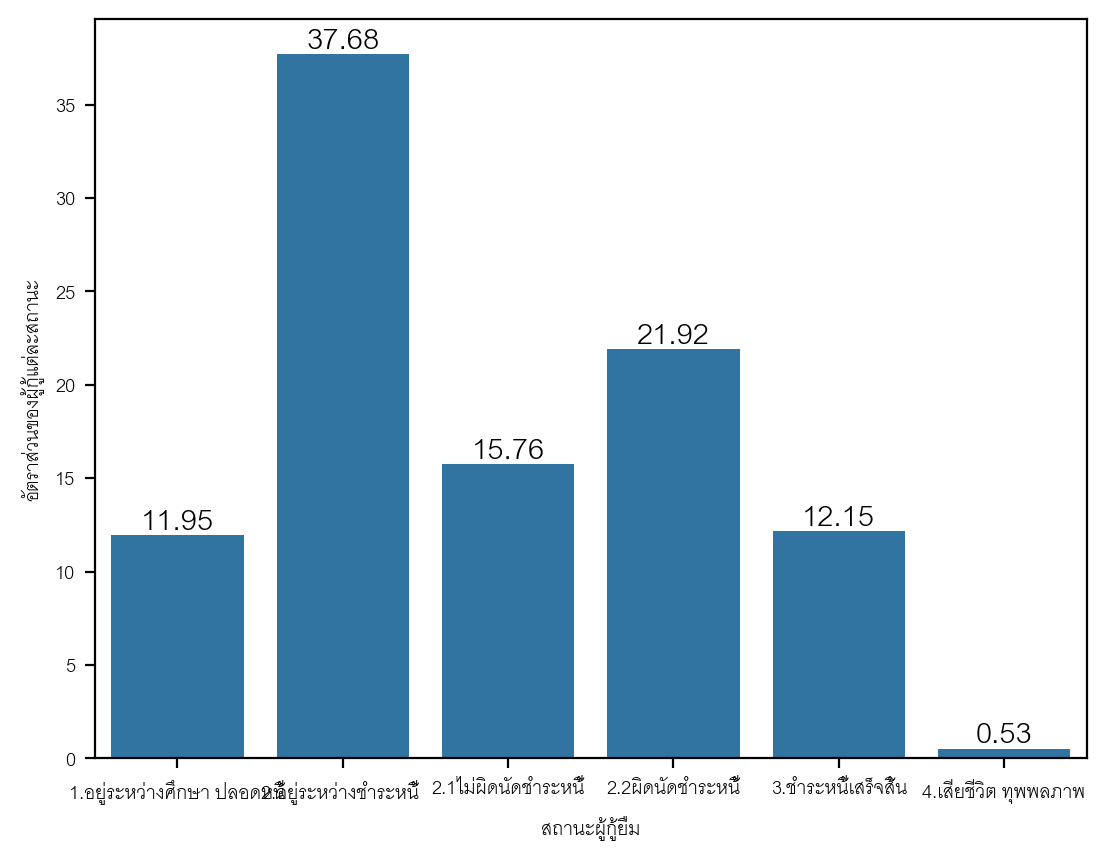

In [56]:
plt.rcParams['font.family'] = 'Cordia new'
g=sns.barplot(data=df1, y="อัตราส่วนของผู้กู้แต่ละสถานะ", x="สถานะผู้กู้ยืม");
g.bar_label(g.containers[0], fontsize=16)

## 6B

In [48]:
# read_csv dataframe
df2 = pd.read_csv('https://data.go.th/dataset/7d177ea4-058d-4562-b7ed-283509aeffed/resource/3aa051d7-b476-4c27-848a-55136f8cd688/download/xx.csv')

# rename column names for easier access
df2.rename(columns={'ปีงบประมาณ': 'Year', ' จำนวนผู้กู้ยืมที่อยู่ระหว่างชำระหนี้ ': 'Count', ' พบข้อมูลจากภาครัฐ ': 'ภาครัฐ', ' พบข้อมูลจากภาคเอกชน ': 'เอกชน'}, inplace=True)

# create a variable to prepare to convert objects to float
cols_to_clean = ['Count', 'ภาครัฐ', 'เอกชน']
df2[cols_to_clean] = df2[cols_to_clean].apply(lambda x: x.str.replace(',', ''))
df2[cols_to_clean] = df2[cols_to_clean].astype(float)

# use apply and lambda to create a new column that accounts for missing people outside of ภาครัฐ and เอกชน
df2['นอกระบบ'] = df2.apply(lambda x: x['Count'] - (x['ภาครัฐ']+x['เอกชน']), axis=1)

# change to long format
melt_df2 = df2.melt(id_vars=['Year'], var_name='Category', value_name='Value')

# Sort_value
Tidy_df2 = melt_df2.sort_values('Year').reset_index()
Tidy_df2.drop('index', axis=1, inplace=True)

,Year,Category,Value
0,2563,Count,3554241.0
1,2563,ภาครัฐ,157082.0
2,2563,เอกชน,1665559.0
3,2563,นอกระบบ,1731600.0
4,2564,Count,3583961.0
5,2564,ภาครัฐ,210922.0
6,2564,เอกชน,1695960.0
7,2564,นอกระบบ,1677079.0
8,2565,Count,3546218.0
9,2565,ภาครัฐ,212388.0


<Axes: xlabel='Year', ylabel='Value'>

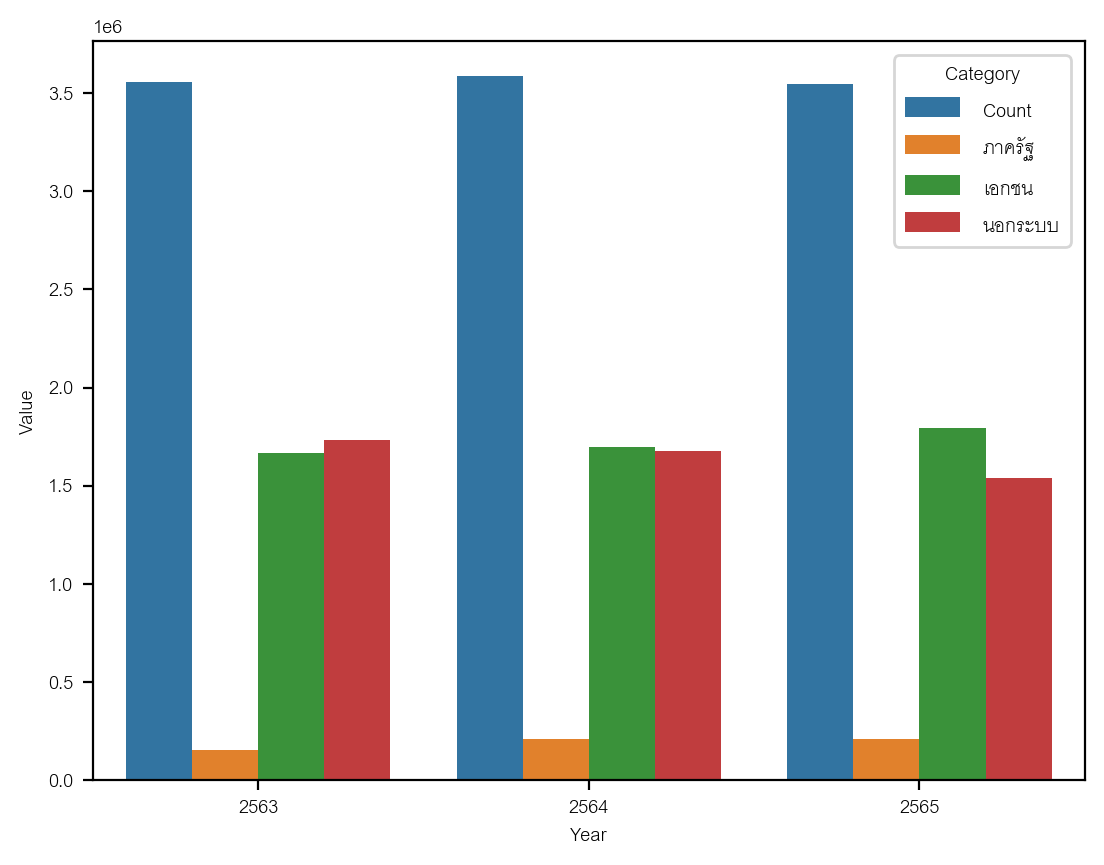

In [54]:
df_filtered = Tidy_df2[Tidy_df2['Category'] != 'Count']

plt.rcParams['font.family'] = 'Cordia new'
sns.barplot(data=Tidy_df2, x='Year',y='Value', hue='Category')